In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pickle
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier

In [2]:
#Load data
X, y = fetch_openml("mnist_784", version = 1, return_X_y = True)

C:\Anaconda\envs\gpu_x\lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
#Normalize
X = X / 255.0

In [4]:
#Split the data into train / test sets
X_train, X_test = X[:50000], X[50000:]
y_train, y_test = y[:50000], y[50000:]

In [5]:
#Create classifier model
classifier = MLPClassifier(
    hidden_layer_sizes=(50, 20, 10),
    max_iter = 100,
    alpha = 1e-4,
    solver = "sgd",
    verbose = 10,
    random_state = 1,
    learning_rate_init = 0.1
)

In [6]:
#Fit the model
model = classifier.fit(X_train, y_train)

Iteration 1, loss = 0.47772268
Iteration 2, loss = 0.16435982
Iteration 3, loss = 0.12618247
Iteration 4, loss = 0.10649038
Iteration 5, loss = 0.09039465
Iteration 6, loss = 0.07945557
Iteration 7, loss = 0.07424755
Iteration 8, loss = 0.06643571
Iteration 9, loss = 0.05982603
Iteration 10, loss = 0.05655218
Iteration 11, loss = 0.04981067
Iteration 12, loss = 0.05127314
Iteration 13, loss = 0.04650352
Iteration 14, loss = 0.04558377
Iteration 15, loss = 0.04044781
Iteration 16, loss = 0.03830433
Iteration 17, loss = 0.03335348
Iteration 18, loss = 0.03522754
Iteration 19, loss = 0.03186215
Iteration 20, loss = 0.02899062
Iteration 21, loss = 0.03440778
Iteration 22, loss = 0.02612465
Iteration 23, loss = 0.03126642
Iteration 24, loss = 0.03066107
Iteration 25, loss = 0.02453159
Iteration 26, loss = 0.02873592
Iteration 27, loss = 0.02469748
Iteration 28, loss = 0.02308180
Iteration 29, loss = 0.02117503
Iteration 30, loss = 0.02228165
Iteration 31, loss = 0.02654033
Iteration 32, los

In [7]:
#Save model by pickle
filename = "Digits_Classifier.sav"
pickle.dump(model, open(filename, 'wb'))

In [8]:
#Load model by pickle
loaded_model = pickle.load(open(filename, 'rb'))

In [9]:
#Evaluate the model
y_pred = loaded_model.predict(X_test)
print("Training set score: %f" % classifier.score(X_train, y_train))
print("Test set score: %f" % classifier.score(X_test, y_test))

Training set score: 0.995400
Test set score: 0.969850


In [10]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_pred)

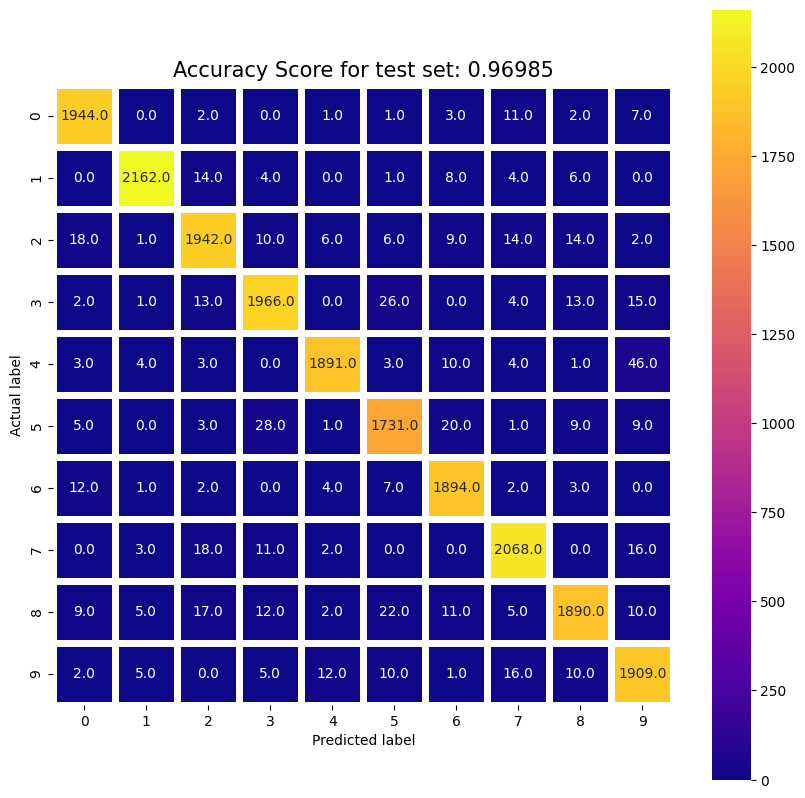

In [11]:
import seaborn as sns
plt.figure(figsize = (10,10))
sns.heatmap(matrix, fmt=".1f", linewidths = 5, square = True, cmap = 'plasma', annot=True);
plt.ylabel("Actual label");
plt.xlabel("Predicted label");
all_sample_title = "Accuracy Score for test set: %.5f" % loaded_model.score(X_test, y_test)
plt.title(all_sample_title, size = 15)
plt.show()